# Shared  Bike Demand Analysis

## problem Statement

To predict the demand of bikes based on which the organization can forecast the demands and accordingly take the necessary measures to  to satisfy the customers.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis,skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [71]:
#df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Bike rider Assignment\\day.csv")
df=pd.read_csv("C:/Users/ADMIN/Desktop/Bike rider Assignment/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

Data Pre-processing: Finding out NaN values and Null Values if any

In [20]:
df.isna().any()

season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

There are no NAN values in the dataset

In [7]:
null_values_table=(df.isna().sum()/df.shape[0])*100
null_values_table

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Identify the data type of the columns

In [72]:
df_types=pd.DataFrame(df.dtypes,columns=['type'])
df_types['type'].value_counts() #column data type count

int64      11
float64     4
object      1
Name: type, dtype: int64

#### There is only one datacolumn "date" which is non-numeric
# Data Description

- season (1:spring, 2:summer, 3:fall, 4:winter)
- year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		-1: Clear, Few clouds, Partly cloudy, Partly cloudy
		-2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		-3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		-4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [73]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### dropping the columns not required for analysis

In [78]:
df.drop("instant",axis=1,inplace=True)
df.drop("dteday",axis=1,inplace=True)

In [79]:
df_numerical =df[["season" ,"temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]  #season is added to numerical variable, to anlyse the pair plot trend

### Display the user count of shared bike  based on season and month

In [80]:
df.groupby(['season', 'mnth'])['cnt'].sum()

season  mnth
1       1       134933
        2       149518
        3       142065
        12       42998
2       3        86855
        4       269094
        5       331686
        6       230954
3       6       115388
        7       344948
        8       351194
        9       249599
4       9        96392
        10      322352
        11      254831
        12      168038
Name: cnt, dtype: int64

### visualizing the demand of shared bike in different seasons and holidays

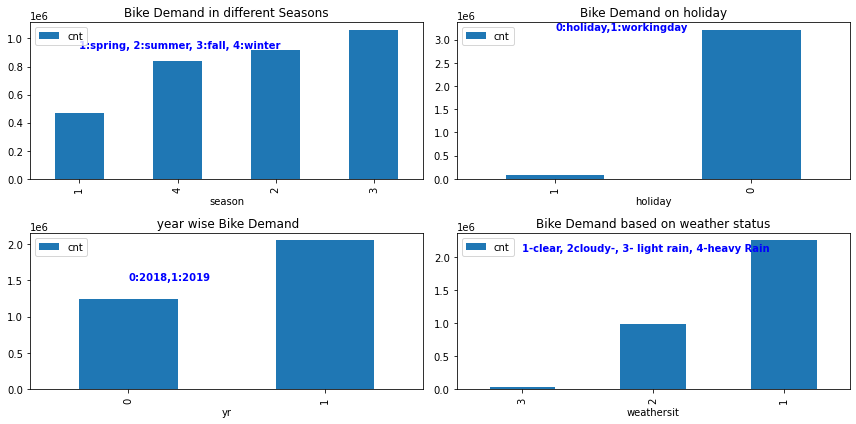

In [81]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(2,2, 1, title="Bike Demand in different Seasons")
ax2 = fig.add_subplot(2,2, 2, title="Bike Demand on holiday")
ax3 = fig.add_subplot(2,2, 3, title=" year wise Bike Demand")
ax4 = fig.add_subplot(2,2, 4, title="Bike Demand based on weather status")
df.groupby('season').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax1)
df.groupby('holiday').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax2)
df.groupby('yr').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax3)
df.groupby('weathersit').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax4)
ax1.text(0,930000, '1:spring, 2:summer, 3:fall, 4:winter', color='blue', fontweight='bold')
ax2.text(0,3200000, '0:holiday,1:workingday', color='blue', fontweight='bold')
ax3.text(0,1500000, '0:2018,1:2019', color='blue', fontweight='bold')
ax4.text(0,2100000, '1-clear, 2cloudy-, 3- light rain, 4-heavy Rain', color='blue', fontweight='bold')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


- Season Fall is having more demand for shared bikes
- Spring season is having less demand for shared bikes
- There is more demand on for the shared shared bikes on holiday
- when compared to 2018, demand has increased in 2019
- There is no demand for shared bikes during heavy rain and more demand when the weather is clear

### pair plot to analyse the trend

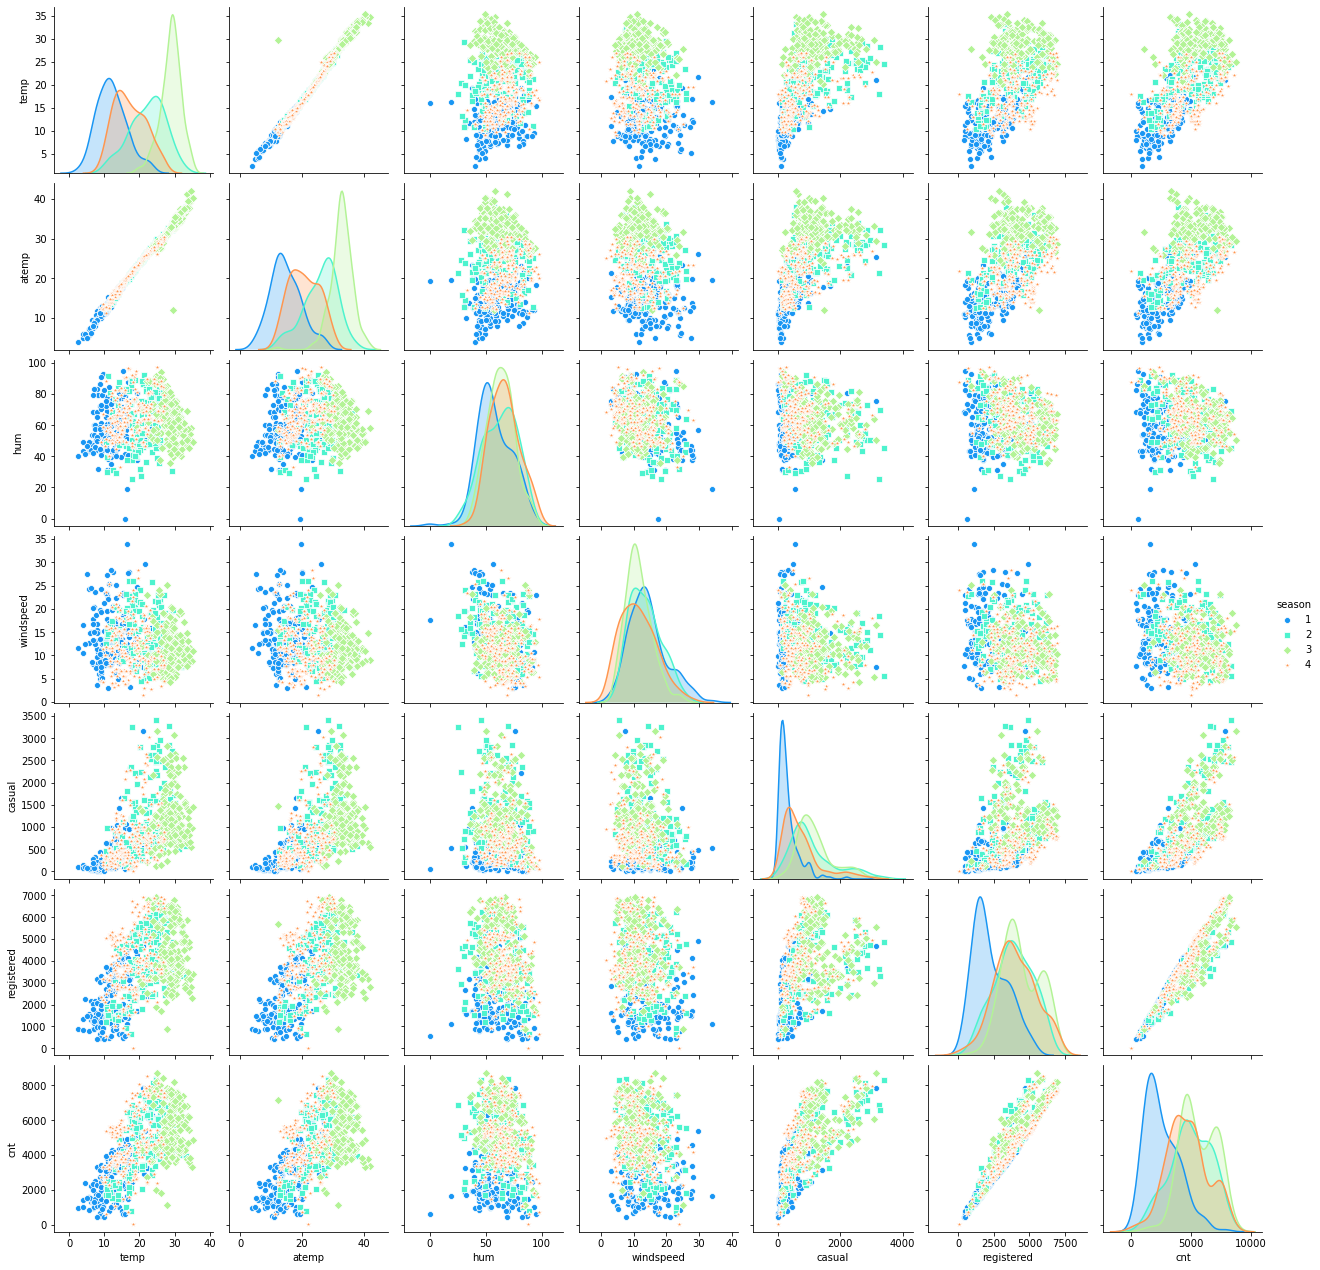

In [82]:
sns.pairplot(df_numerical,hue="season",markers=["o", "s", "D","*"], palette="rainbow")

- temp and atemp are highly correlated.
- they have positive correlation with demand(cnt)
- registered is highly correlated with deman(cnt)

## Visualizing a categorical variable with cnt using Box Plot

In [83]:
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df['yr'].replace({0:'2018',1:'2019'},inplace=True)
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)
df['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)
df['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)
df['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

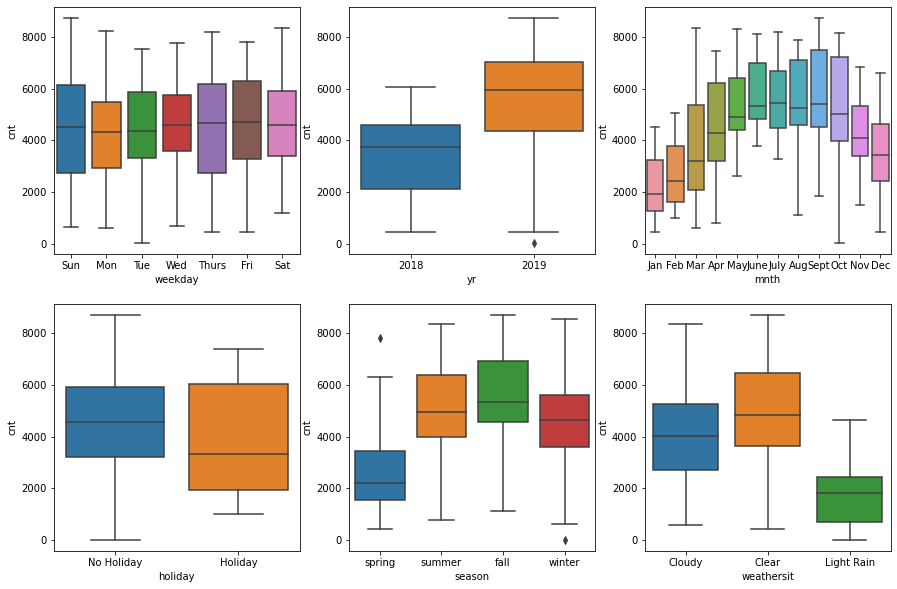

In [129]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

- it is observed that most of the week days are having  median value in the similar range

- there is more demand in 2019 when compared to 2018

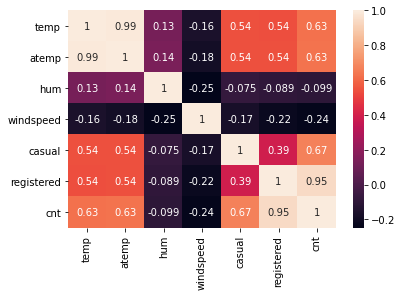

In [85]:
df_numerical.drop("season",axis=1,inplace=True)
plt.figure()
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()


### Creating dummy Variables 

## Data Preparation

In [86]:
cat_data=pd.get_dummies(df[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
cat_data.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [88]:
final_df=pd.concat([df,cat_data],axis=1)
final_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [89]:
final_df=final_df.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [90]:
df_train,df_test=train_test_split(final_df,train_size=0.7,random_state=100)
df_train.shape,df_test.shape

((510, 32), (220, 32))

In [91]:
scaler=MinMaxScaler()

In [92]:
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [93]:
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 

In [94]:
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,...,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,...,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,1,...,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,...,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
y_train=df_train['cnt']
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [97]:
X_train=df_train.drop(['casual', 'registered','cnt'], axis=1)

In [98]:
X_train_xm = sm.add_constant(X_train)
reg1= sm.OLS(y_train, X_train_xm).fit()

In [99]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.81e-180
Time:                        14:58:08   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

## Variance Inflation Factor

In [100]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
print(vif_df)


                 Features     VIF
5      holiday_No Holiday  124.51
0                    temp   66.90
6   workingday_workingday   57.35
1                   atemp   56.03
23            weekday_Sun   31.61
21            weekday_Mon   29.23
7           season_spring   10.77
9           season_winter    9.46
8           season_summer    8.29
18               mnth_Nov    6.79
19               mnth_Oct    6.47
10               mnth_Aug    6.47
13               mnth_Jan    5.90
11               mnth_Dec    5.68
14              mnth_July    5.64
20              mnth_Sept    4.92
12               mnth_Feb    4.39
16               mnth_Mar    3.47
15              mnth_June    2.86
17               mnth_May    2.24
2                     hum    2.05
25            weekday_Tue    1.91
24          weekday_Thurs    1.87
26            weekday_Wed    1.77
22            weekday_Sat    1.76
27      weathersit_Cloudy    1.60
3               windspeed    1.30
28  weathersit_Light Rain    1.30
4             

- holiday_No Holiday has highest VIF value and month march is having highest p value so drop these columns and reiterate 

In [101]:
X_train=X_train.drop(['holiday_No Holiday', 'mnth_Mar'] , axis=1)

In [102]:
X_train_xm = sm.add_constant(X_train)
reg2= sm.OLS(y_train, X_train_xm).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.75e-181
Time:                        15:01:05   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [103]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
print(vif_df)

                 Features     VIF
0                    temp  437.54
1                   atemp  383.38
2                     hum   36.14
5   workingday_workingday   14.97
8           season_winter   10.64
21            weekday_Sun    8.93
19            weekday_Mon    8.32
6           season_spring    8.28
7           season_summer    6.96
9                mnth_Aug    5.67
3               windspeed    5.33
13              mnth_July    5.07
17               mnth_Oct    4.99
16               mnth_Nov    4.83
18              mnth_Sept    3.85
10               mnth_Dec    3.33
14              mnth_June    2.76
12               mnth_Jan    2.64
25      weathersit_Cloudy    2.38
23            weekday_Tue    2.18
22          weekday_Thurs    2.17
4                 yr_2019    2.14
15               mnth_May    2.12
11               mnth_Feb    2.07
24            weekday_Wed    1.98
20            weekday_Sat    1.94
26  weathersit_Light Rain    1.33


- R2 value is reduced from the previous iteration

## Selecting Features influencing  demand of shared bikes using RFE

In [104]:
lm = LinearRegression()
reg3 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
reg3.fit(X_train, y_train)

print(reg3.support_)           
print(reg3.ranking_)  

[ True False  True  True  True  True  True  True  True False False False
  True  True False False False False  True  True False  True False False
 False  True  True]
[ 1  5  1  1  1  1  1  1  1  7  3  4  1  1 12  6  2 11  1  1 10  1 13  8
  9  1  1]


In [105]:
col1 = X_train.columns[reg3.support_]

# Subsetting training data for 15 selected columns
X_train_reg3 = X_train[col1]

# Add a constant to the model
X_train_reg3 = sm.add_constant(X_train_reg3)
X_train_reg3.head()

,const,temp,hum,windspeed,yr_2019,workingday_workingday,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Sept,weekday_Mon,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain
576,1.0,0.815169,0.725633,0.264686,1,0,0,0,0,0,1,0,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,1,1,1,0,0,0,0,0,0,1,1,0
728,1.0,0.245101,0.498067,0.663106,1,1,1,0,0,0,0,0,1,0,0,0
482,1.0,0.395666,0.504508,0.188475,1,1,0,1,0,0,0,0,0,1,1,0
111,1.0,0.345824,0.751824,0.380981,0,0,0,1,0,0,0,0,0,0,1,0


In [106]:
#model fitting
lm1 = sm.OLS(y_train, X_train_reg3).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.22e-191
Time:                        15:04:30   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

- r2 reduced from 85.3 to 84.8

In [35]:
# Drop the features with high P value which is  mnth_Jan 

In [107]:
def find_vif(new):
    vif = pd.DataFrame()
    vif['Features'] = new.columns
    vif['VIF'] = [variance_inflation_factor(new.values, i) for i in range(new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [108]:
new=X_train_reg3.drop('mnth_Jan',axis=1)
find_vif(new)

                 Features    VIF
0                   const  74.92
5   workingday_workingday   9.07
12            weekday_Sun   6.06
11            weekday_Mon   5.74
6           season_spring   5.02
1                    temp   3.62
8           season_winter   3.49
7           season_summer   2.62
2                     hum   1.91
13      weathersit_Cloudy   1.57
9               mnth_July   1.49
10              mnth_Sept   1.30
14  weathersit_Light Rain   1.25
3               windspeed   1.20
4                 yr_2019   1.03


In [38]:
# RFE with 10 features 

In [109]:
lm = LinearRegression()
reg4 = RFE(lm, n_features_to_select=10,step=1)

# Fit with 15 features
reg4.fit(X_train, y_train)

print(reg4.support_)           
print(reg4.ranking_)  

[ True False  True  True  True False  True False False False False False
 False  True False False False False  True False False  True False False
 False  True  True]
[ 1 10  1  1  1  2  1  5  4 12  8  9  6  1 17 11  7 16  1  3 15  1 18 13
 14  1  1]


In [110]:
col1 = X_train.columns[reg4.support_]

# Subsetting training data for 15 selected columns
X_train_reg4 = X_train[col1]

# Add a constant to the model
X_train_reg4 = sm.add_constant(X_train_reg4)
X_train_reg4.head()

,const,temp,hum,windspeed,yr_2019,season_spring,mnth_July,mnth_Sept,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain
576,1.0,0.815169,0.725633,0.264686,1,0,1,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,1,1,0,0,1,1,0
728,1.0,0.245101,0.498067,0.663106,1,1,0,0,0,0,0
482,1.0,0.395666,0.504508,0.188475,1,0,0,0,1,1,0
111,1.0,0.345824,0.751824,0.380981,0,0,0,0,0,1,0


In [111]:
lm2 = sm.OLS(y_train, X_train_reg4).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.32e-184
Time:                        15:09:24   Log-Likelihood:                 489.01
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     499   BIC:                            -909.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [112]:
new=X_train_reg4.drop('weekday_Sun',axis=1)
find_vif(new)

                Features    VIF
0                  const  52.70
1                   temp   2.08
2                    hum   1.81
5          season_spring   1.64
8      weathersit_Cloudy   1.52
6              mnth_July   1.29
9  weathersit_Light Rain   1.24
3              windspeed   1.17
7              mnth_Sept   1.10
4                yr_2019   1.03


In [43]:
# RFE with 5 features 

In [113]:
lm3 = LinearRegression()
reg5 = RFE(lm, n_features_to_select=5,step=1)

# Fit with 15 features
reg5.fit(X_train, y_train)

print(reg5.support_)           
print(reg5.ranking_)  

[ True False  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False  True]
[ 1 15  1  1  1  7  2 10  9 17 13 14 11  3 22 16 12 21  5  8 20  6 23 18
 19  4  1]


In [114]:
col1 = X_train.columns[reg5.support_]

# Subsetting training data for 15 selected columns
X_train_reg5 = X_train[col1]

# Add a constant to the model
X_train_reg5 = sm.add_constant(X_train_reg5)
X_train_reg5.head()

,const,temp,hum,windspeed,yr_2019,weathersit_Light Rain
576,1.0,0.815169,0.725633,0.264686,1,0
426,1.0,0.442393,0.640189,0.255342,1,0
728,1.0,0.245101,0.498067,0.663106,1,0
482,1.0,0.395666,0.504508,0.188475,1,0
111,1.0,0.345824,0.751824,0.380981,0,0


In [115]:
lm3 = sm.OLS(y_train, X_train_reg5).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.85e-149
Time:                        15:10:13   Log-Likelihood:                 392.69
No. Observations:                 510   AIC:                            -773.4
Df Residuals:                     504   BIC:                            -748.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [116]:
new=X_train_reg5
find_vif(new)

                Features    VIF
0                  const  39.38
2                    hum   1.19
3              windspeed   1.13
5  weathersit_Light Rain   1.10
1                   temp   1.07
4                yr_2019   1.02


 - R2 is reduced to 0.748. This is the final model with 5 variables

In [48]:
# Residual Analysis

In [117]:
y_train_pred = lm3.predict(X_train_reg5)


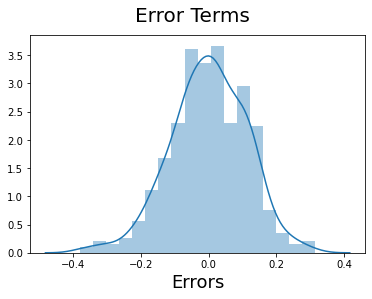

In [118]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [119]:
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [120]:
y_test = df_test.pop('cnt')
X_test = df_test


In [121]:
X_train_reg5.head()

,const,temp,hum,windspeed,yr_2019,weathersit_Light Rain
576,1.0,0.815169,0.725633,0.264686,1,0
426,1.0,0.442393,0.640189,0.255342,1,0
728,1.0,0.245101,0.498067,0.663106,1,0
482,1.0,0.395666,0.504508,0.188475,1,0
111,1.0,0.345824,0.751824,0.380981,0,0


In [122]:
X_test_m5= X_test[["temp","hum","windspeed","yr_2019","weathersit_Light Rain"]]

In [123]:
X_test_m5 = sm.add_constant(X_test_m5)

In [124]:
X_test_m5.head()

,const,temp,hum,windspeed,yr_2019,weathersit_Light Rain
184,1.0,0.831783,0.657364,-0.002099,0,0
535,1.0,0.901354,0.610133,-0.001787,1,0
299,1.0,0.511964,0.837699,-0.000975,0,0
221,1.0,0.881625,0.437098,-0.000950,0,0
152,1.0,0.817246,0.314298,-0.000060,0,0


In [125]:
y_pred = lm3.predict(X_test_m5)

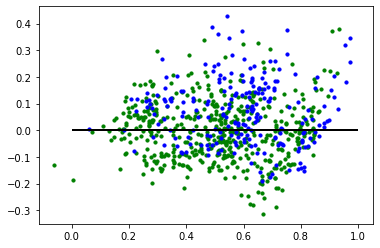

In [126]:
plt.scatter(lm3.predict(X_train_reg5), lm3.predict(X_train_reg5) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(lm3.predict(X_test_m5), lm3.predict(X_test_m5) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax =1, linewidth = 2)

In [127]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5938548432106905

Text(0, 0.5, 'y_pred')

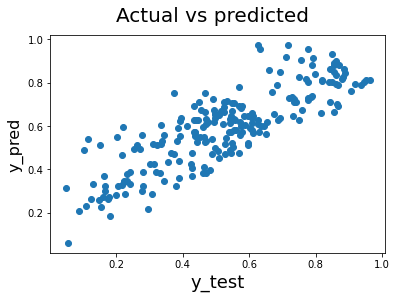

In [128]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual vs predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  